<a href="https://colab.research.google.com/github/vivekkothekarr/ML-Lab-Practicals/blob/main/Practical_3_Vivek_Kothekar_(CS23110).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Vivek Kothekar
USN : CS23110

Aim: To implement Logistic Regression for binary or multiclass classification problems and analyze the classification performance.

---



In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df=df[df['species']!='setosa']

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,spices
50,7.0,3.2,4.7,1.4,0,0
51,6.4,3.2,4.5,1.5,0,0
52,6.9,3.1,4.9,1.5,0,0
53,5.5,2.3,4.0,1.3,0,0
54,6.5,2.8,4.6,1.5,0,0


In [ ]:
df.shape

(100, 6)

In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species  spices
50            7.0          3.2           4.7          1.4        0       0
51            6.4          3.2           4.5          1.5        0       0
52            6.9          3.1           4.9          1.5        0       0
53            5.5          2.3           4.0          1.3        0       0
54            6.5          2.8           4.6          1.5        0       0
..            ...          ...           ...          ...      ...     ...
145           6.7          3.0           5.2          2.3        1       1
146           6.3          2.5           5.0          1.9        1       1
147           6.5          3.0           5.2          2.0        1       1
148           6.2          3.4           5.4          2.3        1       1
149           5.9          3.0           5.1          1.8        1       1

[100 rows x 6 columns]


In [ ]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species  spices
50            7.0          3.2           4.7          1.4        0       0
51            6.4          3.2           4.5          1.5        0       0
52            6.9          3.1           4.9          1.5        0       0
53            5.5          2.3           4.0          1.3        0       0
54            6.5          2.8           4.6          1.5        0       0
..            ...          ...           ...          ...      ...     ...
145           6.7          3.0           5.2          2.3        1       1
146           6.3          2.5           5.0          1.9        1       1
147           6.5          3.0           5.2          2.0        1       1
148           6.2          3.4           5.4          2.3        1       1
149           5.9          3.0           5.1          1.8        1       1

[100 rows x 6 columns]


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,spices
50,7.0,3.2,4.7,1.4,0,0
51,6.4,3.2,4.5,1.5,0,0
52,6.9,3.1,4.9,1.5,0,0
53,5.5,2.3,4.0,1.3,0,0
54,6.5,2.8,4.6,1.5,0,0


In [ ]:
x=df.iloc[:,:-1]
print(x)

     sepal_length  sepal_width  petal_length  petal_width  species
50            7.0          3.2           4.7          1.4        0
51            6.4          3.2           4.5          1.5        0
52            6.9          3.1           4.9          1.5        0
53            5.5          2.3           4.0          1.3        0
54            6.5          2.8           4.6          1.5        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[100 rows x 5 columns]


In [ ]:
y=df.iloc[:,-1]
print(y)

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: spices, Length: 100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor = GridSearchCV(model, param_grid=parameter, scoring='accuracy', cv=5)

In [ ]:
classifier_regressor.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

1.0


In [ ]:
y_pred=classifier_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [ ]:
y_pred=classifier_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



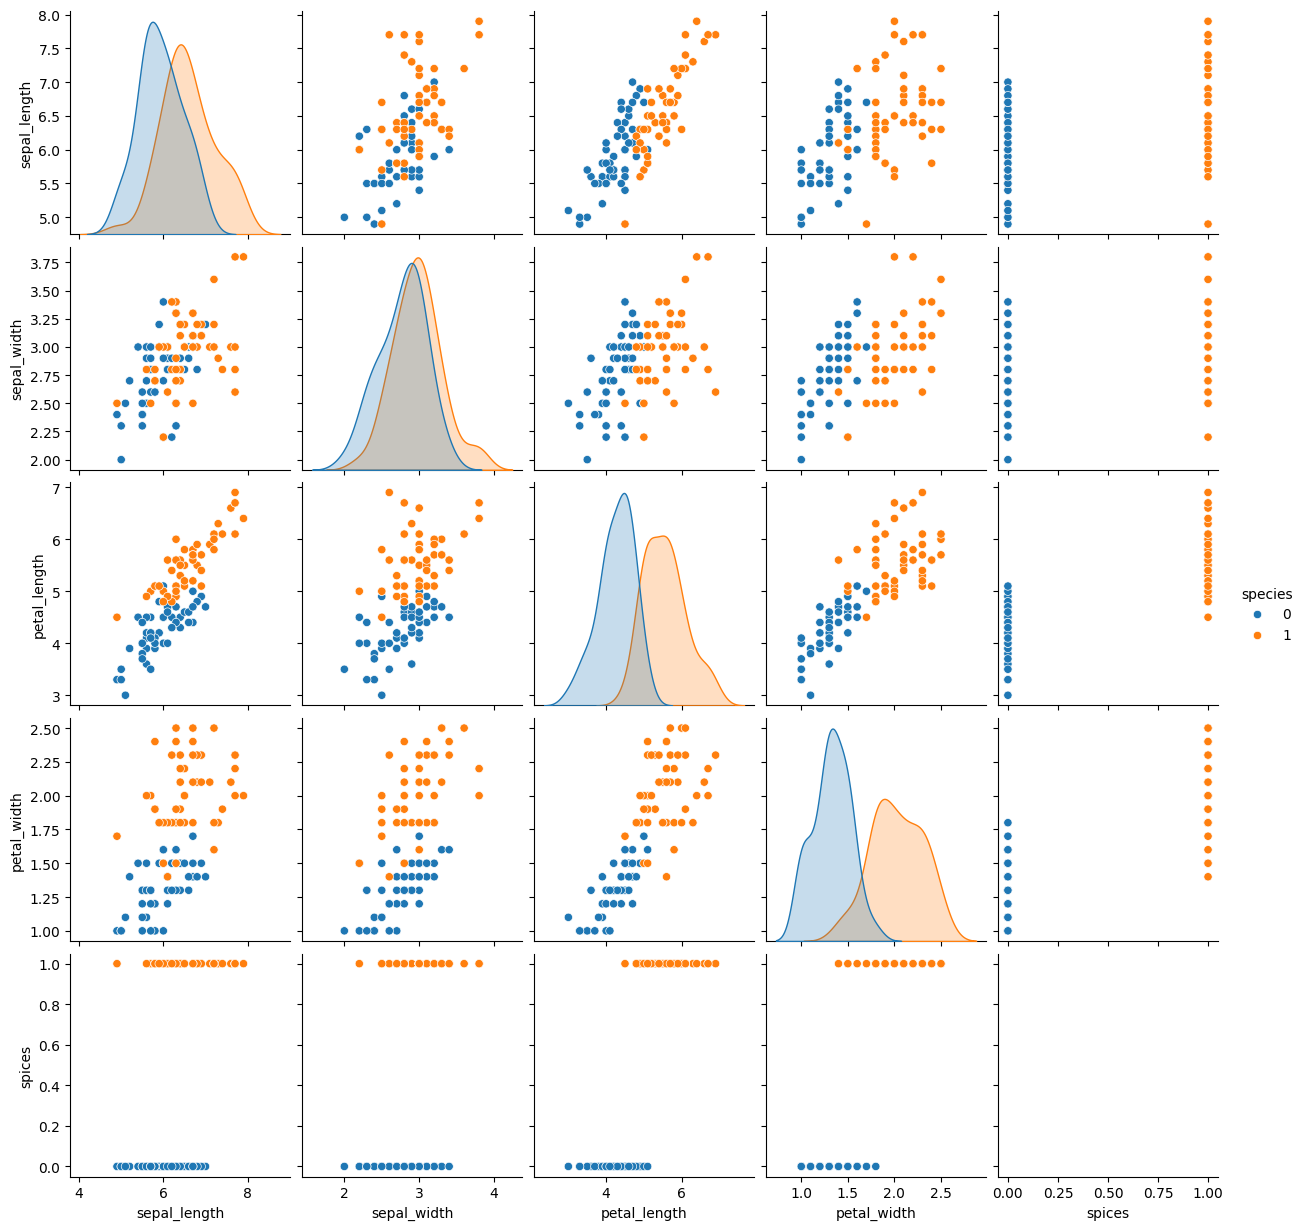

In [ ]:
sns.pairplot(df,hue='species')